In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
historical_data = pd.read_csv('C:/Github Repo/NBA-Analytics/data/basketballProject/prediction-files/predicted-historical-data.csv')
cleaned_data = historical_data.drop(columns=["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.2","index"])
sliced_data = cleaned_data[(cleaned_data["FG3P_PRED"] > 35) & (cleaned_data["FG3P_PRED_DIFF"] > 0) & (cleaned_data["MPG"] > 10)]

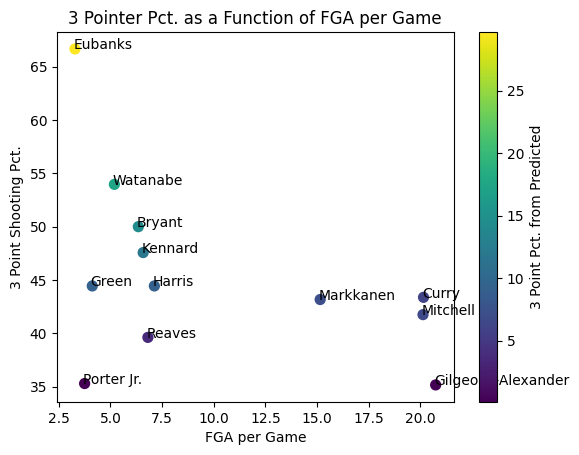

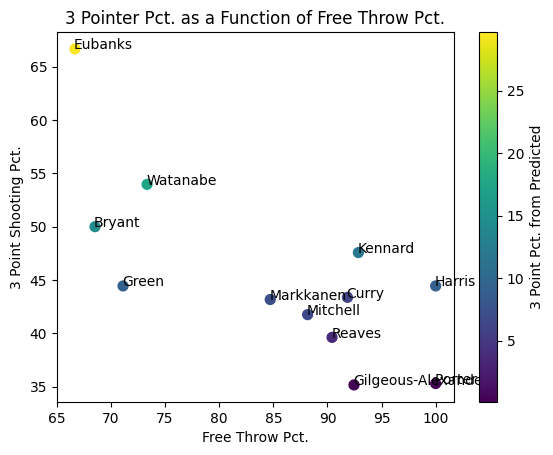

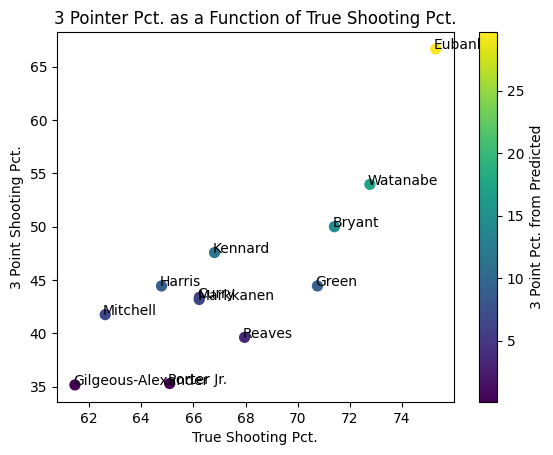

In [9]:
comp_vars = ["FGAPG/FGA per Game","FTP/Free Throw Pct.","TS_PCT/True Shooting Pct."]
for var in comp_vars:
   var_x,var_xlabel = var.split("/")
   var_y = "FG3P"
   var_c = "FG3P_PRED_DIFF"
   chart_title = "3 Pointer Pct. as a Function of " + var_xlabel
   ax = sliced_data.plot.scatter(x=var_x, y=var_y, c=var_c, title=chart_title, s=50)

   # Annotate each data point
   for i, txt in enumerate(sliced_data["PLAYER"]):
      player_name = txt.split(" ")[-1]
      if player_name == "Jr." or player_name == "III":
         player_name = txt.split(" ")[-2] + " " + txt.split(" ")[-1]
      ax.annotate(player_name, (sliced_data[var_x].iat[i]-0.08, sliced_data[var_y].iat[i]))

   ax.set_xlabel(var_xlabel)
   ax.set_ylabel("3 Point Shooting Pct.")
   f = plt.gcf()
   cax = f.get_axes()[1]
   cax.set_ylabel('3 Point Pct. from Predicted')

   plt.show()